<a href="https://colab.research.google.com/github/nimaafshari/TF_Training_Sessions/blob/main/TF_Trianing_Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown


Binary and multiclass classification



Multi-class classification:
Apart from the different network structures which the problem might have, the only difference between binary and multiclass classification is final layer activation function. In binary classification we usually use a sigmoid activation function and in multiclass one softmax is the proper choice. In this example we train a multiclass classification problem using TF for a monochrome image 0-9 number dataset. 

In [70]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


Let's take a look at what we got. First looking at the dataset shapes

In [41]:
print(f'''
Shape of train data:  {training_images.shape}

Shape of train_label data:  {training_labels.shape}

Shape of test data:  {test_images.shape}

Shape of test_label data:  {test_labels.shape}
''')


Shape of train data:  (60000, 28, 28)

Shape of train_label data:  (60000,)

Shape of test data:  (10000, 28, 28)

Shape of test_label data:  (10000,)



Let's look at some examples

#<strong>Label:  3</strong><br/><br/>

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254 141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 254 254 254  34   

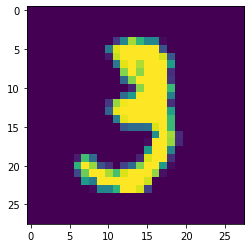

In [42]:
index = 10

np.set_printoptions(linewidth=200)
plt.imshow(training_images[index,:,:])
display(Markdown(f'#<strong>Label:  {training_labels[index]}</strong><br/><br/>'))
print(training_images[index,:,:],'\n\n')


The first step in ML projects is to split the train/test portions. Fortunately, the mnist is splitted to be a better benchmark to compare the models of different researchers. The next step is to normalize the data. This step is not tied to only ML, it is an statistical necessity whenever use optimization methods to make all input data comparable to eachother (Various techniques can produce different results).

In [43]:
# Rescale the images from [0,255] to the [0.0,1.0] range.
training_images, test_images = training_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0

Now let's create our neural network. Unless previous session example here our input is 2-dimensional. Cconvolutionals can handle multidimensions directly and usually we use them for multi-dimesional projects. But for the purpose of this training we convert that to 1-dimensional using the flatten layer and then create our the remaining part of the neural network for a (28*28 = 784) vector

In [44]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4343 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1221 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0808 - accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0575 - accuracy: 0.9837
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0443 - accuracy: 0.9863


Evaluate the model using the test set

In [45]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.0797 - accuracy: 0.9760


[0.07968883961439133, 0.9760000109672546]

Looking at some of the predictions

In [58]:

classifications = model.predict(test_images)

index = 4
print(classifications[index])
display(Markdown(f'#<strong>Predicted Label:  {np.argmax(classifications[index])}</strong><br/>'))
display(Markdown(f'#<strong>Actual Label:  {test_labels[index]}</strong><br/>'))

[2.3729018e-07 6.8371964e-10 1.9119764e-06 8.4839179e-08 9.9812537e-01 1.0393331e-06 3.9120818e-07 1.5104358e-05 8.0365198e-06 1.8478929e-03]


#<strong>Predicted Label:  4</strong><br/>

#<strong>Actual Label:  4</strong><br/>

**Binary Classification**

Here we filter the original data to have only 0 and 9 in our dataset and will try to predict only those 2 classes

In [114]:
def filter_09(x, y):
    keep = (y == 0) | (y == 9)
    x, y = x[keep], y[keep]
    y = (y == 9)
    return x,y

In [115]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

training_images, training_labels = filter_09(training_images, training_labels)
test_images, test_labels = filter_09(test_images, test_labels)

print("Number of filtered training examples:", len(training_images))
print("Number of filtered test examples:", len(test_images))

Number of filtered training examples: 11872
Number of filtered test examples: 1989


Looking at some of those

#<strong>Label:  False</strong><br/><br/>

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  46 105 254 254 254 254 255 239  41   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  37 118 222 254 253 253 253 253 253 253 211  54   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  14 200 253 253 254 253 253 253 253 253 253 253 116   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  16 160 236 253 253 253 254 253 253 246 229 25

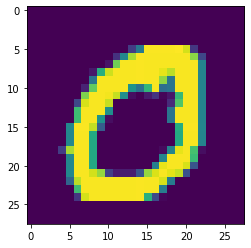

In [116]:
index = 11

np.set_printoptions(linewidth=200)
plt.imshow(training_images[index,:,:])
display(Markdown(f'#<strong>Label:  {training_labels[index]}</strong><br/><br/>'))
print(training_images[index,:,:],'\n\n')


In [117]:
# Rescale the images from [0,255] to the [0.0,1.0] range.
training_images, test_images = training_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(2, activation='sigmoid')])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, validation_data = (test_images, test_labels))

Epoch 1/5
371/371 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 0.9798 - val_loss: 0.0257 - val_accuracy: 0.9915
Epoch 2/5
371/371 [==============================] - 1s 2ms/step - loss: 0.0139 - accuracy: 0.9966 - val_loss: 0.0237 - val_accuracy: 0.9930
Epoch 3/5
371/371 [==============================] - 1s 2ms/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.0189 - val_accuracy: 0.9945
Epoch 4/5
371/371 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9985 - val_loss: 0.0147 - val_accuracy: 0.9950
Epoch 5/5
371/371 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0142 - val_accuracy: 0.9975


In [118]:
classifications = model.predict(test_images)

index = 10
print(classifications[index])
display(Markdown(f'#<strong>Predicted Label:  {np.argmax(classifications[index])}</strong><br/>'))
display(Markdown(f'#<strong>Actual Label:  {test_labels[index]}</strong><br/>'))

[0.9771075  0.01614317]


#<strong>Predicted Label:  0</strong><br/>

#<strong>Actual Label:  False</strong><br/>